In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
from astropy import units as u 
import astrospice
from astropy.time import Time
from sunpy.coordinates import frames
from sunpy.net import Fido, attrs as a
from stixpy.net.client import STIXClient
import matplotlib.pyplot as plt
import numpy as np 

/home/afbattaglia/anaconda3/envs/stix_flare_list/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
#stix_big_flares = pd.read_csv("stix_big_flare_list_20211101_20230424_with_files.csv")
stix_big_flares = pd.read_csv("/home/afbattaglia/Documents/ETHZ/PhD/Codes/Python/test_flare-list/stix_big_flare_list_20210507_20210507_with_files.csv")

In [3]:
stix_big_flares.head()

,flare_id,duration,att_in,peak_UTC,LC0_BKG,_id,GOES_class,GOES_flux,CFL_X_arcsec,CFL_Y_arcsec,...,LC1_PEAK_COUNTS_4S,LC1_BKG_COUNTS_4S,LC2_PEAK_COUNTS_4S,LC2_BKG_COUNTS_4S,LC3_PEAK_COUNTS_4S,LC3_BKG_COUNTS_4S,LC4_PEAK_COUNTS_4S,LC4_BKG_COUNTS_4S,number_available_files,available_file_request_IDs
0,2105070340,276,False,2021-05-07 03:40:27.202,246.006539,1156,B6.0,6.040419e-07,NaN,NaN,...,167,49.0,151,67.0,927,863.0,495,463.0,1,[2105070033]
1,2105071900,4648,False,2021-05-07 19:00:15.193,249.207937,1167,M3.9,3.908444e-05,NaN,NaN,...,34815,49.0,3199,67.0,1471,863.0,543,463.0,5,"[2105070020, 2105070036, 2105070034, 210507004..."


In [4]:
flare_peak_times = Time.strptime(stix_big_flares["peak_UTC"].values.astype(str), format_string="%Y-%m-%d %H:%M:%S.%f")

In [5]:
kernals = astrospice.registry.get_kernels("solar orbiter", "predict")

/home/afbattaglia/anaconda3/envs/stix_flare_list/lib/python3.11/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "dtf2d" yielded 1 of "dubious year (Note 6)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
Files Downloaded: 100%|██████████| 1/1 [00:00<00:00, 12.65file/s]


In [6]:
solo_coords = astrospice.generate_coords("SOLAR ORBITER", flare_peak_times).heliographic_stonyhurst
earth_coords = astrospice.generate_coords("earth", flare_peak_times).heliographic_stonyhurst

In [7]:
stix_big_flares["solo_lat"] = solo_coords.lat.value
stix_big_flares["solo_lon"] = solo_coords.lon.value
stix_big_flares["solo_AU_distance"] = solo_coords.radius.to(u.AU)

In [8]:
stix_big_flares.keys()

Index(['flare_id', 'duration', 'att_in', 'peak_UTC', 'LC0_BKG', '_id',
       'GOES_class', 'GOES_flux', 'CFL_X_arcsec', 'CFL_Y_arcsec', 'start_UTC',
       'end_UTC', 'LC0_PEAK_COUNTS_4S', 'LC0_BKG_COUNTS_4S',
       'LC1_PEAK_COUNTS_4S', 'LC1_BKG_COUNTS_4S', 'LC2_PEAK_COUNTS_4S',
       'LC2_BKG_COUNTS_4S', 'LC3_PEAK_COUNTS_4S', 'LC3_BKG_COUNTS_4S',
       'LC4_PEAK_COUNTS_4S', 'LC4_BKG_COUNTS_4S', 'number_available_files',
       'available_file_request_IDs', 'solo_lat', 'solo_lon',
       'solo_AU_distance'],
      dtype='object')

In [9]:
stix_big_flares.rename(columns={'LC0_PEAK_COUNTS_4S': '4-10 keV', 
                                'LC1_PEAK_COUNTS_4S': "10-15 keV",
                                'LC2_PEAK_COUNTS_4S': "15-25 keV", 
                                'LC3_PEAK_COUNTS_4S': "25-50 keV", 
                                'LC4_PEAK_COUNTS_4S': "50-84 keV"}, inplace=True)

In [10]:
stix_big_flares.head()

,flare_id,duration,att_in,peak_UTC,LC0_BKG,_id,GOES_class,GOES_flux,CFL_X_arcsec,CFL_Y_arcsec,...,LC2_BKG_COUNTS_4S,25-50 keV,LC3_BKG_COUNTS_4S,50-84 keV,LC4_BKG_COUNTS_4S,number_available_files,available_file_request_IDs,solo_lat,solo_lon,solo_AU_distance
0,2105070340,276,False,2021-05-07 03:40:27.202,246.006539,1156,B6.0,6.040419e-07,NaN,NaN,...,67.0,927,863.0,495,463.0,1,[2105070033],-0.360447,-97.415114,0.915778
1,2105071900,4648,False,2021-05-07 19:00:15.193,249.207937,1167,M3.9,3.908444e-05,NaN,NaN,...,67.0,1471,863.0,543,463.0,5,"[2105070020, 2105070036, 2105070034, 210507004...",-0.381317,-97.426606,0.917506


In [11]:
columns = ['flare_id', 'att_in', 'GOES_flux', 'start_UTC', 'peak_UTC', 'end_UTC', '4-10 keV', '10-15 keV',
           'number_available_files', 'available_file_request_IDs', 'solo_lat', 'solo_lon',
           'solo_AU_distance']

In [12]:
stix_flares_tidy = stix_big_flares[columns]

## Lets find all flares with pixel data

In [13]:
stix_flare_w_files = stix_flares_tidy[stix_flares_tidy["number_available_files"]>=1]
stix_flare_w_files.reset_index(inplace=True, drop=True)

In [14]:
stix_flare_w_files.loc[:, "Request IDs"] = stix_flare_w_files["available_file_request_IDs"].map(lambda x: x.strip('][').split(', ')[0])

In [15]:
stix_flare_w_files

,flare_id,att_in,GOES_flux,start_UTC,peak_UTC,end_UTC,4-10 keV,10-15 keV,number_available_files,available_file_request_IDs,solo_lat,solo_lon,solo_AU_distance,Request IDs
0,2105070340,False,6.040419e-07,2021-05-07T03:39:03.201,2021-05-07 03:40:27.202,2021-05-07T03:43:39.202,2175,167,1,[2105070033],-0.360447,-97.415114,0.915778,2105070033
1,2105071900,False,3.908444e-05,2021-05-07T18:45:55.192,2021-05-07 19:00:15.193,2021-05-07T20:03:23.200,311295,34815,5,"[2105070020, 2105070036, 2105070034, 210507004...",-0.381317,-97.426606,0.917506,2105070020


In [60]:
def get_pixel_data(tstart, tend, request_id):
    res = Fido.search(a.Time(tstart, tend), a.Instrument.stix, a.stix.DataProduct.sci_xray_cpd)
    res = res["stix"][list(res["stix"]["Request ID"]) == request_id]
    f = Fido.fetch(res, path="./pixel_data/{file}")
    if len(f)>0:
        return "./"+f[0]
    else:
        return ''

def get_aux_data(tstart, tend):
    res = Fido.search(a.Time(tstart, tend), a.Instrument.stix, a.stix.DataProduct.aux_ephemeris)
    f = Fido.fetch(res, path="./aux_data/{file}")
    if len(f)>0:
        return "./"+f[0]
    else:
        return ''

In [27]:
stix_flare_w_files.head()

,flare_id,att_in,GOES_flux,start_UTC,peak_UTC,end_UTC,4-10 keV,10-15 keV,number_available_files,available_file_request_IDs,solo_lat,solo_lon,solo_AU_distance,Request IDs,aux_paths,pixel_paths
0,2105070340,False,6.040419e-07,2021-05-07T03:39:03.201,2021-05-07 03:40:27.202,2021-05-07T03:43:39.202,2175,167,1,[2105070033],-0.360447,-97.415114,0.915778,2105070033,./aux_data/solo_L2_stix-aux-ephemeris_20210507...,
1,2105071900,False,3.908444e-05,2021-05-07T18:45:55.192,2021-05-07 19:00:15.193,2021-05-07T20:03:23.200,311295,34815,5,"[2105070020, 2105070036, 2105070034, 210507004...",-0.381317,-97.426606,0.917506,2105070020,./aux_data/solo_L2_stix-aux-ephemeris_20210507...,


In [61]:
aux_paths = []
pixel_paths = []
for i in range(len(stix_flare_w_files)):
    row = stix_flare_w_files.iloc[i]
    tstart, tend, request_id = row["start_UTC"], row["end_UTC"], row["Request IDs"]
    pixel_paths.append(get_pixel_data(tstart, tend, request_id))
    aux_paths.append(get_aux_data(tstart, tend))
    

Files Downloaded: 100%|██████████| 1/1 [00:00<00:00, 22.94file/s]


In [53]:
row = stix_flare_w_files.iloc[0]
tstart, tend, request_id = row["start_UTC"], row["end_UTC"], row["Request IDs"]
tstart, tend, request_id, type(request_id)

('2021-05-07T03:39:03.201', '2021-05-07T03:43:39.202', '2105070033', str)

In [54]:
res = Fido.search(a.Time(tstart, tend), a.Instrument.stix, a.stix.DataProduct.sci_xray_cpd)
res, res["stix"]["Request ID"]

(<sunpy.net.fido_factory.UnifiedResponse object at 0x7f934857c6d0>
 Results from 1 Provider:
 
 1 Results from the STIXClient:
 
        Start Time               End Time        Instrument ... Ver Request ID
 ----------------------- ----------------------- ---------- ... --- ----------
 2021-05-07 03:39:13.000 2021-05-07 03:42:13.000       STIX ... V01 2105070033
 ,
 <QueryResponseColumn name='Request ID' dtype='int64' length=1>
 2105070033)

In [58]:
el = list(res["stix"]["Request ID"])
el

[2105070033]

In [59]:
res = res["stix"][list(res["stix"]["Request ID"]) == request_id]
res

Start Time,End Time,Instrument,Level,DataType,DataProduct,Ver,url,Request ID
str23,str23,str4,str2,str3,str12,str3,str144,int64
2021-05-07 03:39:13.000,2021-05-07 03:42:13.000,STIX,L1,SCI,sci-xray-cpd,V01,http://pub099.cs.technik.fhnw.ch/data/fits/L1/2021/05/07/SCI/solo_L1_stix-sci-xray-cpd_20210507T033913-20210507T034213_V01_2105070033-54725.fits,2105070033


In [ ]:
f = Fido.fetch(res, path="./pixel_data/{file}")

In [20]:
stix_flare_w_files["aux_paths"] = aux_paths
stix_flare_w_files["pixel_paths"] = pixel_paths

In [21]:
stix_flare_w_files.to_csv("full_flarelist_with_paths.csv", index=False, index_label=False)

In [22]:
import pandas as pd

In [23]:
final_flares = pd.read_csv("full_flarelist_with_paths.csv")

In [24]:
final_flares.head()

,flare_id,att_in,GOES_flux,start_UTC,peak_UTC,end_UTC,4-10 keV,10-15 keV,number_available_files,available_file_request_IDs,solo_lat,solo_lon,solo_AU_distance,Request IDs,aux_paths,pixel_paths
0,2105070340,False,6.040419e-07,2021-05-07T03:39:03.201,2021-05-07 03:40:27.202,2021-05-07T03:43:39.202,2175,167,1,[2105070033],-0.360447,-97.415114,0.915778,2105070033,./aux_data/solo_L2_stix-aux-ephemeris_20210507...,NaN
1,2105071900,False,3.908444e-05,2021-05-07T18:45:55.192,2021-05-07 19:00:15.193,2021-05-07T20:03:23.200,311295,34815,5,"[2105070020, 2105070036, 2105070034, 210507004...",-0.381317,-97.426606,0.917506,2105070020,./aux_data/solo_L2_stix-aux-ephemeris_20210507...,NaN


(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([3.33745926, 3.55303055, 3.76860184, 3.98417313, 4.19974441,
        4.4153157 , 4.63088699, 4.84645828, 5.06202957, 5.27760086,
        5.49317215]),
 <BarContainer object of 10 artists>)

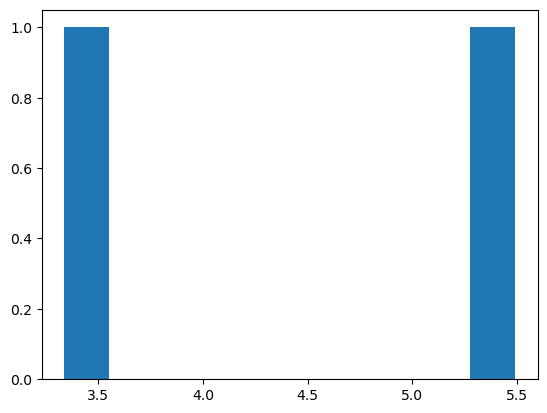

In [25]:
plt.hist(np.log10(final_flares["4-10 keV"]))